In [1]:
# project: p6
# submitter: cjhon
# partner: none
# hours: 30

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box, Point
import pandas as pd

In [3]:
locations = gpd.read_file("counties.geojson")
locations.head()

,NAME,POP100,geometry
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669..."
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422..."
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.72460 44.338..."
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379..."
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192..."


In [4]:
#q1
len(locations['NAME'].unique())

72

In [5]:
from sqlite3 import connect
conn = connect('counties_tracts.db')

counties_tracts = pd.read_sql("""SELECT * FROM sqlite_master""", conn)
counties_tracts

,type,name,tbl_name,rootpage,sql
0,table,counties,counties,2,"CREATE TABLE ""counties"" (\n""index"" INTEGER,\n ..."
1,index,ix_counties_index,counties,3,"CREATE INDEX ""ix_counties_index""ON ""counties"" ..."
2,table,tracts,tracts,4,"CREATE TABLE ""tracts"" (\n""index"" INTEGER,\n ""..."
3,index,ix_tracts_index,tracts,5,"CREATE INDEX ""ix_tracts_index""ON ""tracts"" (""in..."


In [6]:
counties = pd.read_sql("""SELECT * FROM counties""", conn)
counties.head()

,index,NAME,COUNTY,AREALAND,AREAWATER
0,0,Racine County,101,861533739,1190103013
1,1,Clark County,019,3133378070,23239614
2,2,Wood County,141,2054044751,41994799
3,3,Rusk County,107,2366092584,44813690
4,4,Ozaukee County,089,603514413,2287415379


In [7]:
tracts = pd.read_sql("""SELECT * FROM tracts""", conn)
tracts.head()

,index,NAME,COUNTY,HU100
0,0,Census Tract 9701.01,085,2760
1,1,Census Tract 9710.01,085,1536
2,2,Census Tract 9706.01,085,1208
3,3,Census Tract 9706.02,085,3136
4,4,Census Tract 4301,131,2144


In [8]:
# locations_arealand = locations.merge(counties[['NAME','AREALAND']], how="left", on="NAME")
locations_arealand = locations.merge(counties, how="left", on="NAME")

locations_arealand.head()

,NAME,POP100,geometry,index,COUNTY,AREALAND,AREAWATER
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669...",0,101,861533739,1190103013
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422...",1,019,3133378070,23239614
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.72460 44.338...",2,141,2054044751,41994799
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379...",3,107,2366092584,44813690
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192...",4,089,603514413,2287415379


<AxesSubplot:>

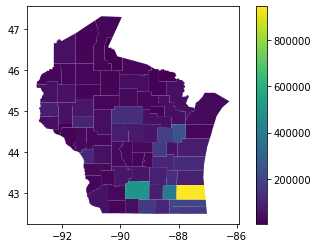

In [9]:
#q2
locations_arealand.plot(column="POP100",legend =True, cmap="viridis")

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

train, test = train_test_split(locations_arealand, test_size=0.25, random_state=320)

In [11]:
#q3
list(test['NAME'])

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [12]:
#q4
lr = LinearRegression()
lr.fit(train[["AREALAND"]], train["POP100"])
lr.score(test[["AREALAND"]], test["POP100"])

0.022002661530554857

In [13]:
#q5
temporary = pd.DataFrame([1e6 * 500 * 2.59])
lr.predict(temporary)[0]

/home/charles/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82032.53073541154

HU100

In [14]:
grouped = tracts.groupby('COUNTY').sum().reset_index()
# grouped
grouped_formatted= grouped[['COUNTY', 'HU100']]
grouped_formatted = grouped_formatted.rename(columns={"HU100": "HUsummed"})
# grouped_formatted

locations_arealand_HU100  = locations_arealand.merge(grouped_formatted, how="left", on="COUNTY")
# locations_arealand_HU100

train_hu, test_hu = train_test_split(locations_arealand_HU100, test_size=0.25, random_state=320)

In [15]:
#q6
list(test_hu['NAME'].unique())


['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [16]:
#q7
dict(zip(train_hu.NAME, train_hu.HUsummed))

{'Walworth County': 51531,
 'Marquette County': 9896,
 'Racine County': 82164,
 'Waupaca County': 25396,
 'Lincoln County': 16784,
 'Washburn County': 12979,
 'Door County': 23966,
 'Waukesha County': 160864,
 'Sheboygan County': 50766,
 'La Crosse County': 48402,
 'Langlade County': 12360,
 'Marathon County': 57734,
 'Jefferson County': 35147,
 'Price County': 11120,
 'Vilas County': 25116,
 'Columbia County': 26137,
 'Ozaukee County': 36267,
 'Fond du Lac County': 43910,
 'Crawford County': 8802,
 'Lafayette County': 7230,
 'Green County': 15856,
 'Marinette County': 30379,
 'Vernon County': 13720,
 'Douglas County': 22825,
 'Rock County': 68422,
 'Iowa County': 10719,
 'Dane County': 216022,
 'Bayfield County': 12999,
 'Polk County': 24248,
 'Trempealeau County': 12619,
 'Brown County': 104371,
 'Washington County': 54695,
 'Chippewa County': 27185,
 'Oconto County': 23537,
 'Richland County': 8868,
 'Portage County': 30054,
 'Sawyer County': 15975,
 'Menominee County': 2253,
 'Barr

In [17]:
#q8
from sklearn.model_selection import cross_val_score
lr_hu = LinearRegression()
arr = cross_val_score(lr_hu, train_hu[["HUsummed"]],train_hu[["POP100"]],cv=5)
np.average(arr)

0.9652534544116037

In [18]:
#q9
np.std(arr)

0.03704265206670459

In [19]:
lr_hu.fit(train_hu[["HUsummed"]],train_hu[["POP100"]])
coef = lr_hu.coef_[0]
intercept = lr_hu.intercept_

In [20]:
#q10
"POP100 = 2.39*HU100 + -7910.46"

'POP100 = 2.39*HU100 + -7910.46'

Text(0, 0.5, 'POP100')

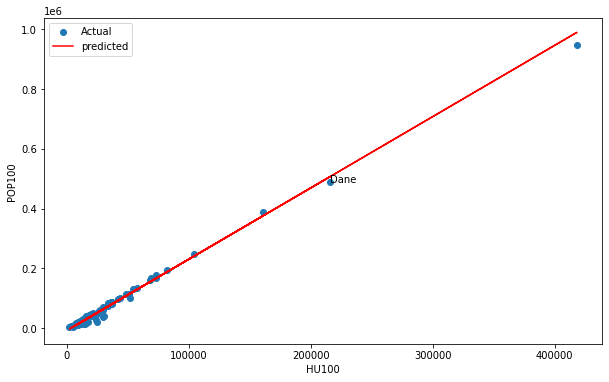

In [21]:
#q11
dane = locations_arealand_HU100.loc[locations_arealand_HU100['NAME']=='Dane County']

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

ax.scatter(locations_arealand_HU100['HUsummed'],locations_arealand_HU100['POP100'],label='Actual' )
ax.plot(locations_arealand_HU100['HUsummed'],locations_arealand_HU100['HUsummed']* coef+intercept,'red', label='predicted')
ax.legend()
ax.text(dane['HUsummed'],dane['POP100'], 'Dane',ha='left')
ax.set_xlabel("HU100")
ax.set_ylabel("POP100")


In [22]:
#q12
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])

len(A[np.where(np.logical_and(A>=2, A<=5))])


12

In [23]:
import rasterio
import rasterio.features
import rasterio.warp
from matplotlib.colors import ListedColormap

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

                NAME  POP100  \
15  Milwaukee County  947735   

                                             geometry  
15  POLYGON ((-87.82631 42.84223, -87.82418 42.842...  


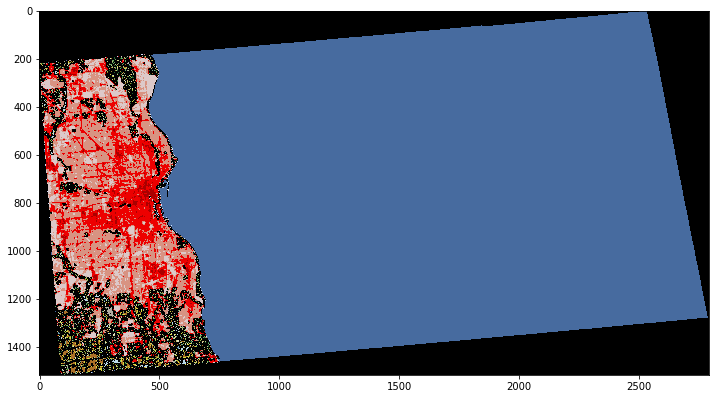

In [24]:
#q13
land = rasterio.open("zip://./land.zip!wi.tif")  #매디슨 wi 전 지역 가져오기

# 밀워키 polygon 가져오기
counties = gpd.read_file('counties.geojson')
milwaukee = counties.loc[counties['NAME'] == 'Milwaukee County']
# milwaukee.plot()
print(milwaukee)


#rarsterio에 gpd 입력
from rasterio.mask import mask
matrix, _ = mask(land, milwaukee.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(matrix, vmin=0, vmax=255,cmap=custom_cmap)


In [25]:
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}

In [26]:
#q14
a = matrix.reshape(1,-1)
water=0
counter = 0
for x in a[0]:
    if x in land_use.values():
        if x == land_use['open_water']:
            water +=1
        counter +=1
        
water/counter

0.7963037455950543

<AxesSubplot:xlabel='count', ylabel='POP100'>

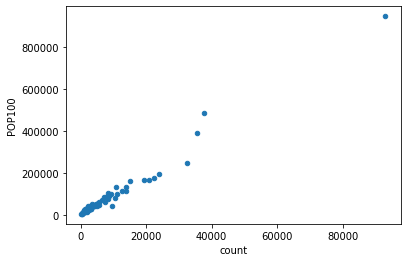

In [27]:
#q15
relationship = {}

for i in counties.to_crs(land.crs).itertuples():
    matrix, _ = mask(land, [i.geometry], crop=True)
    matrix = matrix[0]
    
    currdict={}
    for num in land_use:
        currdict[num]=0
    a = matrix.reshape(1,-1)
    
#     barren = 31
#     developed_med = 24
#     openwater=11
    unique, counts = np.unique(a, return_counts=True)
    counts = dict(zip(unique, counts))

    relationship[i.NAME] = counts[24]
relationship

attr_col = pd.DataFrame.from_dict(relationship,orient='index')
formatted_attr_col = attr_col.reset_index().rename(columns={'index': 'NAME', 0:'count'})
formatted_attr_col
merged_countiesformatted_attr_col = counties.merge(formatted_attr_col, on='NAME', how='left')
merged_countiesformatted_attr_col.plot.scatter('count', 'POP100')

Text(0, 0.5, 'R^2 Score')

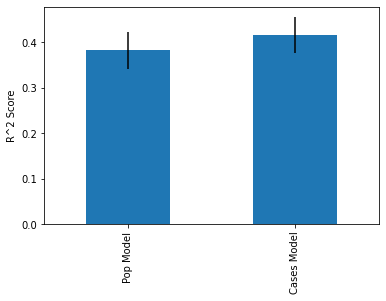

In [28]:
#q16
tracts = gpd.read_file("tracts.geojson")

relationship = {}

for i in tracts.to_crs(land.crs).itertuples():
    matrix, _ = mask(land, [i.geometry], crop=True)
    matrix = matrix[0]

    currdict={}
    for num in land_use:
        currdict[num]=0
    a = matrix.reshape(1,-1)
    
    land_use_num = 23
    
    unique, counts = np.unique(a, return_counts=True)
    count_dict = dict(zip(unique, counts))

    if land_use_num in count_dict:
        relationship[i.GEOID] = count_dict[land_use_num]
    else:
        relationship[i.GEOID] =0

#count formatting for regression
tract_developed_high = pd.DataFrame.from_dict(relationship,orient='index')
formatted_tract_developed_high = tract_developed_high.reset_index().rename(columns={'index': 'GEOID', 0:'count'})
merged_formatted_tract_developed_high = tracts.merge(formatted_tract_developed_high, on='GEOID', how='left')

#split train test
train_in, test_in = train_test_split(merged_formatted_tract_developed_high, test_size=0.25, random_state=320)

#model 1
lr_in = LinearRegression()
lr_in.fit(train_in[['count']],train_in[["POP100"]])

#model 2
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
X_poly = poly.fit_transform(train_in[['count']])
poly = LinearRegression()

# visualize
scores1 = cross_val_score(lr_in, train_in[['count']],train_in[['POP100']])
scores2 = cross_val_score(poly,  X_poly, train_in[['POP100']])
avg = pd.Series({"Pop Model": scores1.mean(), "Cases Model": scores2.mean()})
std = pd.Series({"Pop Model": scores1.std(), "Cases Model": scores2.std()})
ax = avg.plot.bar(yerr=std)
ax.set_ylabel("R^2 Score")

In [29]:
#q17
"I will use linear model because it has a difference with 3% difference, but having more stability for prediction"
scores1.mean()

0.3827922254716966